enter size of input x[n]: 4
enter element 10
enter element 21
enter element 32
enter element 43


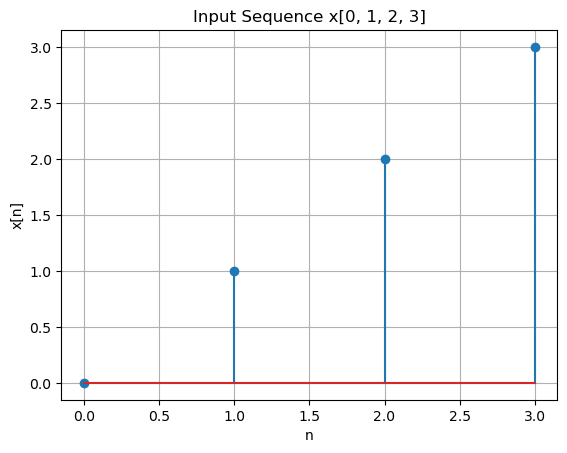

[(6+0j), (-2.0000000000000004+1.9999999999999998j), (-2-7.34788079488412e-16j), (-1.9999999999999984-2.000000000000001j)]


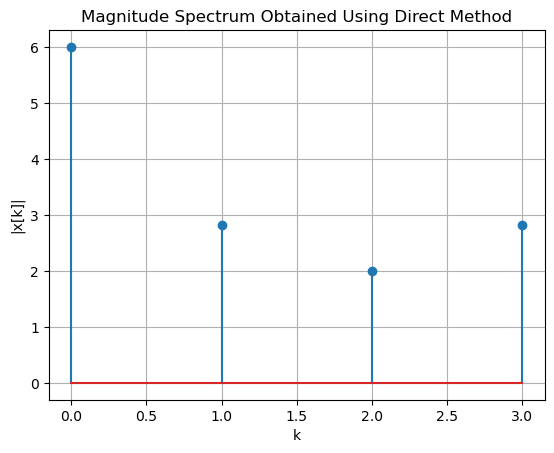

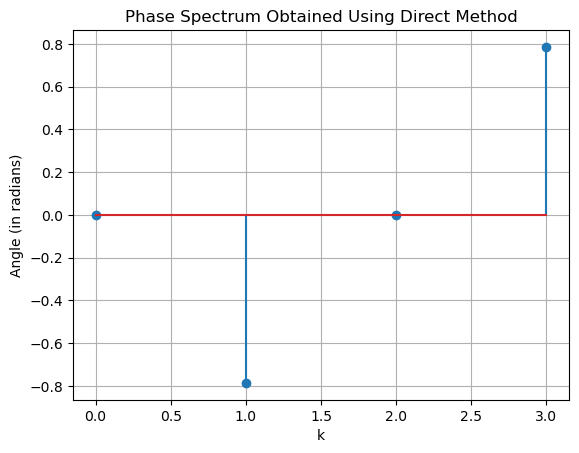

[[0], [0], [0], [0]]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

sizex = int(input("enter size of input x[n]: "))
x = [0]*sizex
for i in range(0,sizex):
    x[i] = int(input("enter element " + str(i + 1)))
#print(x)

plt.xlabel('n')
plt.ylabel('x[n]')
plt.title("Input Sequence x{}".format(x))
plt.stem(np.arange(0, sizex), x)
plt.grid(True) # Configure the grid lines
plt.show()

def summation(k):
    sum = 0
    for n in range(sizex):
        expo = np.exp((-2j*np.pi*k*n)/sizex)
        sum = sum + float(x[n]) * expo
    return sum

ft_direct = []
for k in range(sizex):
    ft_direct.append(summation(k))
print(ft_direct)

magnitude_spectrum_direct = []
phase_spectrum_direct = []
for i in range(len(ft_direct)):
    magnitude_spectrum_direct.append((ft_direct[i].real**2 + ft_direct[i].imag**2)**0.5)
    phase_direct = np.arctan(ft_direct[i].imag / ft_direct[i].real)
    phase_spectrum_direct.append(phase_direct)
    
plt.xlabel('k')
plt.ylabel('|x[k]|')
plt.title("Magnitude Spectrum Obtained Using Direct Method")
plt.stem(np.arange(0, len(magnitude_spectrum_direct)), magnitude_spectrum_direct)
plt.grid(True) # Configure the grid lines
plt.show()

plt.xlabel('k')
plt.ylabel('Angle (in radians)')
plt.title("Phase Spectrum Obtained Using Direct Method")
plt.stem(np.arange(0, len(phase_spectrum_direct)), phase_spectrum_direct)
plt.grid(True) # Configure the grid lines
plt.show()

#using linear transformation

r1 = c1 =sizex
wn = []
for i in range(r1):
    for j in range(c1):
        wn.append((np.exp(-2j*np.pi*i*j)/sizex))

wn_multidm = np.reshape(wn,(r1,c1)) # N*N W(N) matrix
r2 = sizex
c2 = 1
x_multidm = np.reshape(x,(r2,c2))  # N*1 x(N) matrix


#compute X(N) = W(N) * x(N), an N*1 matrix
ft_multidm = [[0]*c2]*r1
#print(ft_multidm)
ft_lt = []  #multidimensional array to 1D
for i in range(r1):
    for j in range(c2):
        ft_multidm[i][j] = 0
        for k in range(c1):
            ft_multidm[i][j] += wn_multidm[i][k] * float(x_multidm[k][j])
        temp = ft_multidm[i][j]
        ft_lt.append(ft_multidm[i][j])

magnitude_spectrum_l_t = []
phase_spectrum_l_t = []
for sample in range(len(ft_lt)):
    magnitude_spectrum_l_t.append((ft_lt[sample].real**2 + ft_lt[sample].imag**2)**0.5)
    phase_l_t = np.arctan(ft_lt[sample].imag / ft_lt[sample].real)
    phase_spectrum_l_t.append(phase_l_t)
    
plt.xlabel('k')
plt.ylabel('|x[k]|')
plt.title("Magnitude Spectrum Obtained Using Linear Transformation Method")
plt.stem(np.arange(0, len(magnitude_spectrum_l_t)), magnitude_spectrum_l_t)
plt.grid(True) # Configure the grid lines
plt.show() 

plt.xlabel('k')
plt.ylabel('Angle (in radians)')
plt.title("Phase Spectrum Obtained Using Linear Transformation Method")
plt.stem(np.arange(0, len(phase_spectrum_l_t)), phase_spectrum_l_t)
plt.grid(True) # Configure the grid lines
plt.show()